# Proyecto Final: Procesamiento de Datos - Grupo N°18

**Integrantes:**

    * Gutiérrez Diego - dgutierrez.m79@gmail.com - Git_user:Diego-wert89
    * Gutiérrez Laura - laurasgneco@gmail.com - Git_user:laurasg2022
    * Hilgemberg Maria Sol - shilgembergmariasol22@gmail.com - Git_user:sol-hilgemberg
    * Lara Mariela - marzular@gmail.com - Git_user:MARIELARA
    * Ruani Julio - julio.ruani@gmail.com - Git_user:immersSoftware
    * Sánchez Jorge Ignacio - nacho.sanchezsolano@gmail.com - Git_user:nachosanchezsolano
    * Valdiviezo Melisa - melisa.valdiviezo@gmail.com - Git_user:MEV-656

 **El proyecto consiste en desarrollar un procesamiento de datos que incluya las siguientes etapas:** 

**1) Recolección y preparación de datos: Obtener o recolectar conjuntos de datos relevantes para el tema elegido. Realizar las tareas de limpieza, integración y transformación necesarias para preparar los datos para el análisis.**

Para el proyecto utilizamos el siguiente dataset: https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023

En la recolección se hace una carga del data set en la notebook que contiene un archivo csv listo para empezar el desarrollo.

In [2]:
#Primero importamos las librerias que se van a utilizar
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

#Leemos el data set con pandas (dataframe) y con el head mostramos los primeros 10 registros para evaluar el contenido.
data_df=pd.read_csv("../Data_Sets/ds_salaries.csv")

data_df.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
5,2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,L
6,2023,SE,FT,Applied Scientist,136000,USD,136000,US,0,US,L
7,2023,SE,FT,Data Scientist,219000,USD,219000,CA,0,CA,M
8,2023,SE,FT,Data Scientist,141000,USD,141000,CA,0,CA,M
9,2023,SE,FT,Data Scientist,147100,USD,147100,US,0,US,M


In [3]:
#Analizamos las dimensiones del data set en el dataframe:

data_df.shape

#Como resultado tenemos 3755 filas y 11 columnas.

(3755, 11)

In [4]:
#Evaluamos los tipos de datos que hay en las columnas.

data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


Analizando el data set podemos concluir que tenemos lo siguiente:

1-El data set tiene 3755 filas y 11 columnas.

2-Contiene datos del tipo string(object) e int(enteros).

3-No tiene faltantes de datos.

Igualmente se procede hacer una doble verificación para ver si hay faltante de datos:

In [5]:
#Faltante de datos
data_df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

Finalmente se observa que no hay faltantes de datos en los campos del data set, por lo que se prosigue con la limpieza de datos.

**Limpieza**

Para su aplicación se van a evaluar los siguientes puntos:

-Columnas irrelevantes

-Cambio nombres de atributos.

-Registros repetidos.

-Valores extremos.



**Columnas irrelevantes:** observamos que las columnas "salary" y "salary_currency" no son necesarias para el analisis, ya que la columna salary_in_usd se encarga de representar el salario de los empleados de forma comparativa. 

In [6]:
#Se procede a eliminar las columnas "salary" y "salary_currency" porque no son relevantes.

data_df.drop(data_df[['salary','salary_currency']], axis = 1, inplace = True)
data_df

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,US,100,US,L


In [7]:
#Verificación del borrado de los campos anteriores.
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary_in_usd       3755 non-null   int64 
 5   employee_residence  3755 non-null   object
 6   remote_ratio        3755 non-null   int64 
 7   company_location    3755 non-null   object
 8   company_size        3755 non-null   object
dtypes: int64(3), object(6)
memory usage: 264.2+ KB


**Cambio de nombres en atributos:** para un mejor analisis se procede a cambiar el nombre de los atributos para traducirlos de ingles a español, con el fin de que se adapte al lector objetivo.

In [8]:
#Cambio de nombres en los atributos:

data_df.rename(columns={'work_year':'Año_de_trabajo','experience_level':'Nivel_de_experiencia','employment_type':'Tipo_de_empleo','job_title':'Título_de_trabajo','salary_in_usd':'Salario_en_usd','employee_residence':'Residencia_empleado','remote_ratio':'Ratio_remoto','company_location':'Ubicación_empresa','company_size':'tamaño_de_empresa'}, inplace = True)
data_df

,Año_de_trabajo,Nivel_de_experiencia,Tipo_de_empleo,Título_de_trabajo,Salario_en_usd,Residencia_empleado,Ratio_remoto,Ubicación_empresa,tamaño_de_empresa
0,2023,SE,FT,Principal Data Scientist,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,US,100,US,L


Renombramos algunos valores para una mejor comprensión:

In [9]:
#Asignamos los nuevos valores.
data_df['Nivel_de_experiencia'] = data_df['Nivel_de_experiencia'].replace({
    'SE': 'Senior',
    'EN': 'Entry level',
    'EX': 'Executive level',
    'MI': 'Mid/Intermediate level',
})

data_df['Tipo_de_empleo'] = data_df['Tipo_de_empleo'].replace({
    'FL': 'Freelancer',
    'CT': 'Contractor',
    'FT' : 'Full-time',
    'PT' : 'Part-time'
})
data_df['tamaño_de_empresa'] = data_df['tamaño_de_empresa'].replace({
    'S': 'SMALL',
    'M': 'MEDIUM',
    'L' : 'LARGE',
})

data_df.head(10)

,Año_de_trabajo,Nivel_de_experiencia,Tipo_de_empleo,Título_de_trabajo,Salario_en_usd,Residencia_empleado,Ratio_remoto,Ubicación_empresa,tamaño_de_empresa
0,2023,Senior,Full-time,Principal Data Scientist,85847,ES,100,ES,LARGE
1,2023,Mid/Intermediate level,Contractor,ML Engineer,30000,US,100,US,SMALL
2,2023,Mid/Intermediate level,Contractor,ML Engineer,25500,US,100,US,SMALL
3,2023,Senior,Full-time,Data Scientist,175000,CA,100,CA,MEDIUM
4,2023,Senior,Full-time,Data Scientist,120000,CA,100,CA,MEDIUM
5,2023,Senior,Full-time,Applied Scientist,222200,US,0,US,LARGE
6,2023,Senior,Full-time,Applied Scientist,136000,US,0,US,LARGE
7,2023,Senior,Full-time,Data Scientist,219000,CA,0,CA,MEDIUM
8,2023,Senior,Full-time,Data Scientist,141000,CA,0,CA,MEDIUM
9,2023,Senior,Full-time,Data Scientist,147100,US,0,US,MEDIUM


**Registros repetidos:** se debe verificar que no se repitan registros en el data set, porque podrian perjudicar el resultado del análisis.

In [10]:
# Verificación de registros duplicados
duplicados = data_df[data_df.duplicated()]
if not duplicados.empty:
    print("Hay registros duplicados encontrados:")
    duplicados_df = pd.DataFrame(duplicados)
    display(duplicados_df)
else:
    print("No se encontraron registros duplicados en el dataset.")

Hay registros duplicados encontrados:


,Año_de_trabajo,Nivel_de_experiencia,Tipo_de_empleo,Título_de_trabajo,Salario_en_usd,Residencia_empleado,Ratio_remoto,Ubicación_empresa,tamaño_de_empresa
115,2023,Senior,Full-time,Data Scientist,150000,US,0,US,MEDIUM
123,2023,Senior,Full-time,Analytics Engineer,289800,US,0,US,MEDIUM
153,2023,Mid/Intermediate level,Full-time,Data Engineer,100000,US,100,US,MEDIUM
154,2023,Mid/Intermediate level,Full-time,Data Engineer,70000,US,100,US,MEDIUM
160,2023,Senior,Full-time,Data Engineer,115000,US,0,US,MEDIUM
...,...,...,...,...,...,...,...,...,...
3439,2022,Mid/Intermediate level,Full-time,Data Scientist,78000,US,100,US,MEDIUM
3440,2022,Senior,Full-time,Data Engineer,135000,US,100,US,MEDIUM
3441,2022,Senior,Full-time,Data Engineer,115000,US,100,US,MEDIUM
3586,2021,Mid/Intermediate level,Full-time,Data Engineer,200000,US,100,US,LARGE


In [11]:
#Eliminamos los registros duplicados:

data_df.drop_duplicates(inplace=True)

In [12]:
# Verificación nuevamente si hay registros duplicados.
duplicados = data_df[data_df.duplicated()]
if not duplicados.empty:
    print("Hay registros duplicados encontrados:")
    duplicados_df = pd.DataFrame(duplicados)
    display(duplicados_df)
else:
    print("No se encontraron registros duplicados en el dataset.")

No se encontraron registros duplicados en el dataset.


**Valores extremos:** nos permite ver si hay datos que no son adecuados, valores fuera de un rango, etc.

Por ejemplo: en el salario no puede haber un valor negativo.

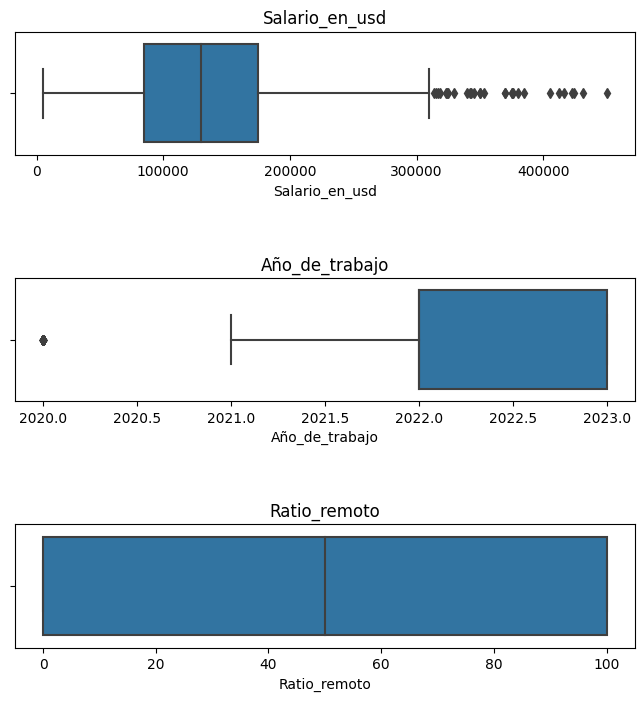

In [13]:
# Valores extremos
# Tomamos las columnas con varibles numéricas que queremos analizar
cols_num = ['Salario_en_usd', 'Año_de_trabajo', 'Ratio_remoto']

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(8,8))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(cols_num):
    sbn.boxplot(x=col, data=data_df, ax=ax[i])
    ax[i].set_title(col)

In [14]:
#También utilizamos "IQR method" para detectar Outliers
q1,q2,q3=data_df['Salario_en_usd'].quantile([0.25,0.5,0.75])
print('Q1: ',q1,'\nQ2: ',q2, '\nQ3: ',q3)

Q1:  84975.0 
Q2:  130000.0 
Q3:  175000.0


In [15]:
#calculamos el rango intercuartil, como medida de dispersion
iqr=q3-q1
iqr

90025.0

In [16]:
#establecemos los rangos para determinar valores normales o atípicos
# atípico leve
li=q1-(1.5*iqr)
ls=q3+(1.5*iqr)
print ('limite superior leve: ',ls,'limite inferior leve: ',li)

limite superior leve:  310037.5 limite inferior leve:  -50062.5


In [17]:
#buscamos los salarios que sean distantes de los limites leves calculados
data_df.query('(Salario_en_usd<@li) or (Salario_en_usd>@ls)') 

,Año_de_trabajo,Nivel_de_experiencia,Tipo_de_empleo,Título_de_trabajo,Salario_en_usd,Residencia_empleado,Ratio_remoto,Ubicación_empresa,tamaño_de_empresa
33,2023,Senior,Full-time,Computer Vision Engineer,342810,US,0,US,MEDIUM
133,2023,Senior,Full-time,Machine Learning Engineer,342300,US,0,US,LARGE
145,2023,Senior,Full-time,Machine Learning Engineer,318300,US,100,US,MEDIUM
228,2023,Executive level,Full-time,Head of Data,329500,US,0,US,MEDIUM
478,2023,Executive level,Full-time,Director of Data Science,353200,US,0,US,MEDIUM
488,2023,Senior,Full-time,Data Scientist,317070,US,0,US,MEDIUM
528,2023,Senior,Full-time,AI Scientist,423834,IL,0,IL,LARGE
649,2023,Senior,Full-time,Data Architect,376080,US,100,US,MEDIUM
845,2023,Mid/Intermediate level,Full-time,Research Scientist,340000,US,100,US,MEDIUM
1105,2023,Senior,Full-time,Data Scientist,370000,US,0,US,MEDIUM


In [18]:
#atípicos extremos
li=q1-(3*iqr)
ls=q3+(3*iqr)
print ('limite superior extremo: ',ls,'limite inferior extremo: ',li)

limite superior extremo:  445075.0 limite inferior extremo:  -185100.0


In [19]:
#buscamos los salarios que sean distantes de los limites extremos calculados
data_df.query('(Salario_en_usd<@li) or (Salario_en_usd>@ls)') 

,Año_de_trabajo,Nivel_de_experiencia,Tipo_de_empleo,Título_de_trabajo,Salario_en_usd,Residencia_empleado,Ratio_remoto,Ubicación_empresa,tamaño_de_empresa
3522,2020,Mid/Intermediate level,Full-time,Research Scientist,450000,US,0,US,MEDIUM


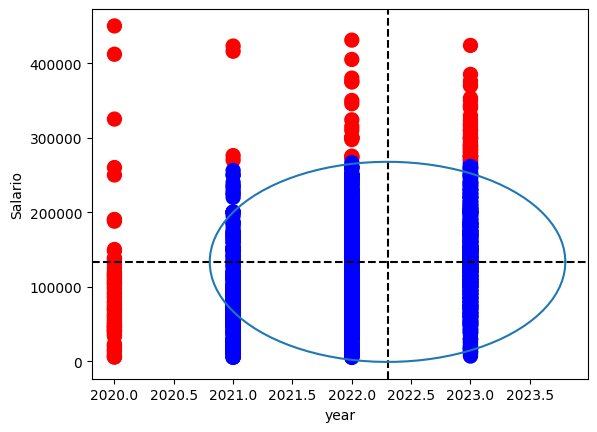

In [20]:
from math import pi
 
salary = data_df['Salario_en_usd']
year=data_df['Año_de_trabajo']
media = (salary).mean()
std_x = (salary).std()*2
media_y = (year).mean()
std_y = (year).std()*2
 
colors = ['blue']*len(salary)
for index, x in enumerate(salary):
    if abs(x-media) > std_x:
        colors[index] = 'red'
        
for index, x in enumerate(year):
    if abs(x-media_y) > std_y:
        colors[index] = 'red'
 
plt.scatter(year, salary, s=100, color=colors)
plt.axhline(media, color='k', linestyle='--')
plt.axvline(media_y, color='k', linestyle='--')
 
v=media     #y-position of the center
u=media_y    #x-position of the center
b=std_x     #radius on the y-axis
a=std_y    #radius on the x-axis
 
t = np.linspace(0, 2*pi, 100)
plt.plot( u+a*np.cos(t) , v+b*np.sin(t) )
 
plt.xlabel('year')
plt.ylabel('Salario')
plt.show()

#Dentro del circulo azul, los valores que están en la media y en rojo los outliers: valores que superan en más de 2 veces el desvío estándar.

**Conclusión Valores extremos:** No se detectan valores negativos en salarios, y dado que la variable analizada puede estar relacionada a otras variables como el título, nivel de experiencia , es que NO excluiremos estos valores atípicos.

**2) Análisis exploratorio de datos: Aplicar técnicas de análisis exploratorio para comprender y explorar los datos en profundidad. Esto puede incluir la identificación de patrones, relaciones, valores atípicos y distribuciones de variables.**

i-Obtenemos los cálculos estadístico del dataset.


In [21]:
#Resumen de datos estadísticos que forman parte del conjunto de datos.
data_df.describe().round(2)

,Año_de_trabajo,Salario_en_usd,Ratio_remoto
count,2584.00,2584.00,2584.00
mean,2022.30,133409.28,50.48
std,0.75,67136.84,48.16
min,2020.00,5132.00,0.00
25%,2022.00,84975.00,0.00
50%,2022.00,130000.00,50.00
75%,2023.00,175000.00,100.00
max,2023.00,450000.00,100.00


Observación:

- Podemos observar que hay una cantidad de 2584 registros lo que indica que no hay valores nulos.

- Presenta un promedio de 133409 en el salario en usd.

- Tiene un desvio estandar minimo de 0.75 en el año de trabajo. 

- El valor minimo mas bajo es de 0 que representa la presencialidad en el ratio_remoto y el valor maximo es de 450000 que representa el salario.



ii-Trazamos histogramas de variables numéricas: para entender cómo se distribuyen en el conjunto de datos. Esto puede ayudarnos a identificar sesgos o patrones interesantes.

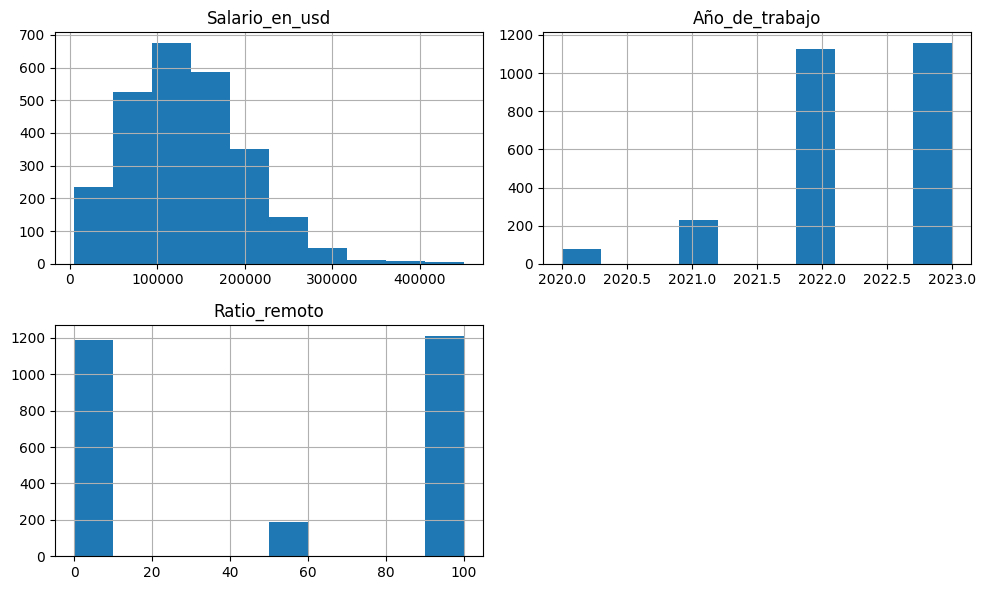

In [22]:
#Histogramas
data_df[['Salario_en_usd', 'Año_de_trabajo', 'Ratio_remoto']].hist(bins=10, figsize=(10, 6))
plt.tight_layout()
plt.show()

**Observaciones:**

- La mayor parte del grupo de salarios tiene entre los 50000 y los 200000 usd, con sesgo hacia los 10000-150000 usd.
- La mayor parte del grupo de las años de trabajo (75%) tiene un mayor incremento superando por poco a el año 2022.

iii-Comparar valor unico en cada campo.

In [23]:
#Recorre cada campo y cuenta el número de valores distintos.
for column in data_df.columns:
    num_valores_distintos = len(data_df[column].unique())
    print(f"{column}: {num_valores_distintos} valores distintos")

Año_de_trabajo: 4 valores distintos
Nivel_de_experiencia: 4 valores distintos
Tipo_de_empleo: 4 valores distintos
Título_de_trabajo: 93 valores distintos
Salario_en_usd: 1035 valores distintos
Residencia_empleado: 78 valores distintos
Ratio_remoto: 3 valores distintos
Ubicación_empresa: 72 valores distintos
tamaño_de_empresa: 3 valores distintos


iv-Calculo de cantidades filtradas por campo mas relevante.

In [24]:
#Cantidades por Año de trabajo

Año_de_trabajo_cant = data_df['Año_de_trabajo'].value_counts()
Año_de_trabajo_cant

Año_de_trabajo
2023    1156
2022    1125
2021     228
2020      75
Name: count, dtype: int64

In [85]:
from plotly import graph_objs as go

def tar_var_summary(data_df, target):
    fig = go.Figure()
    fig.add_trace(go.Violin(x=data_df[target], line_color='#6C9BCF', name='Happy', y0=0))
    fig.update_traces(orientation='h', side='positive', meanline_visible=False)
    fig.update_layout(
        title={'text': "Distribution of the Target Variable",
               'y': 0.9,
               'x': 0.5,
               'xanchor': 'center',
               'yanchor': 'top'},
        barmode='overlay',
        yaxis=dict(title='Count'),
        xaxis=dict(title='Año_de_trabajo', dtick=1),
        template='plotly_dark'
    )
    fig.show()

tar_var_summary(data_df, "Año_de_trabajo")

In [25]:
#Cantidades por Nivel de experiencia

Nivel_de_experiencia_cant = data_df['Nivel_de_experiencia'].value_counts()
Nivel_de_experiencia_cant

Nivel_de_experiencia
Senior                    1554
Mid/Intermediate level     664
Entry level                270
Executive level             96
Name: count, dtype: int64

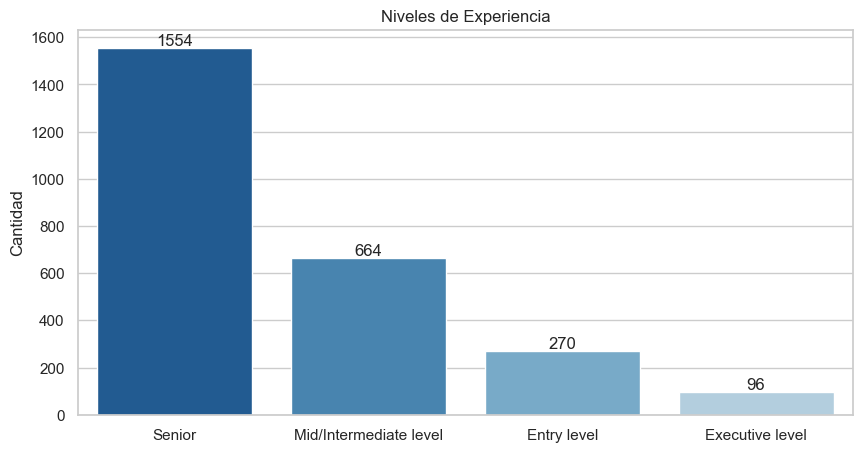

In [42]:
fig, ax = plt.subplots(figsize=(10, 5))
sbn.set(style = 'whitegrid')  
palette = sbn.color_palette("Blues",n_colors=5)
palette.reverse()

sbn.countplot(ax = ax, data = data_df, x = data_df.Nivel_de_experiencia,palette=palette)

ax.set(xlabel='', ylabel='Cantidad', title='Niveles de Experiencia')
ax.bar_label(ax.containers[0])
plt.show()

In [52]:
#Cantidades por Tipo de empleo

Tipo_de_empleo_cant = data_df['Tipo_de_empleo'].value_counts()
Tipo_de_empleo_cant

Tipo_de_empleo
Full-time     2547
Part-time       17
Contractor      10
Freelancer      10
Name: count, dtype: int64

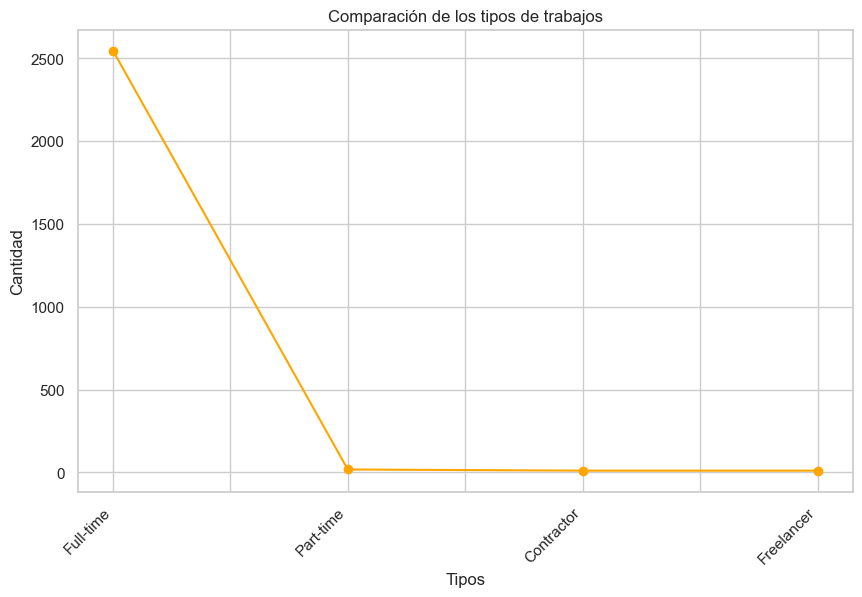

In [65]:
# Obtener las frecuencias de cada ítem en una columna
frecuencias = data_df['Tipo_de_empleo'].value_counts()

frecuencias = frecuencias.sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(10, 6))
frecuencias.plot(kind='line', marker='o', color='orange')

plt.title('Comparación de los tipos de trabajos')
plt.xlabel('Tipos')
plt.ylabel('Cantidad')

plt.xticks(rotation=45, ha='right')

plt.show()

In [70]:
#Cantidades por Titulo de trabajo

Titulo_de_trabajo_cant = data_df['Título_de_trabajo'].value_counts()
Titulo_de_trabajo_cant.T

Título_de_trabajo
Data Engineer                598
Data Scientist               538
Data Analyst                 396
Machine Learning Engineer    206
Analytics Engineer            91
                            ... 
Compliance Data Analyst        1
Deep Learning Researcher       1
Staff Data Analyst             1
Data DevOps Engineer           1
Finance Data Analyst           1
Name: count, Length: 93, dtype: int64

In [84]:
top15_job_titles = data_df['Título_de_trabajo'].value_counts()[:15]
fig = px.bar(y = top15_job_titles.values, x = top15_job_titles.index, 
            text = top15_job_titles.values, title = 'Los 15 principales titulos de trabajos')
fig.update_layout(xaxis_title = "Titulos de trabajo", yaxis_title = "Cantidad")
fig.show()

In [69]:
#Cantidades por Residencia de empleado

Residencia_de_empleado_cant = data_df['Residencia_empleado'].value_counts()
Residencia_de_empleado_cant.T

Residencia_empleado
USA    1893
GBR     150
CAN      81
IND      70
ESP      47
       ... 
BIH       1
ARM       1
CYP       1
KWT       1
MLT       1
Name: count, Length: 78, dtype: int64

In [83]:
import country_converter as coco
country = coco.convert(names = data_df['Residencia_empleado'], to = "ISO3")
data_df['Residencia_empleado'] = country

residence = data_df['Residencia_empleado'].value_counts()
fig = px.choropleth(locations = residence.index,
                    color = residence.values,
                    color_continuous_scale=px.colors.sequential.YlGn,
                    title = 'Localización de empleados por mapa')
fig.show()

In [66]:
#Cantidades por Tamaño de empresa

Tamaño_de_empresa_cant = data_df['tamaño_de_empresa'].value_counts()
Tamaño_de_empresa_cant

tamaño_de_empresa
MEDIUM    2028
LARGE      409
SMALL      147
Name: count, dtype: int64

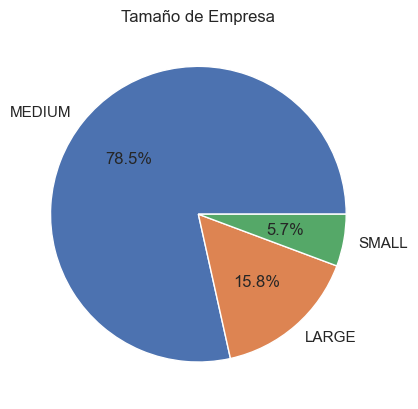

In [58]:
# Obtener las frecuencias de cada ítem en una columna
frecuencias = data_df['tamaño_de_empresa'].value_counts()

porcentajes = frecuencias * 100 / frecuencias.sum()

porcentajes.plot(kind='pie', autopct='%.1f%%')

plt.title('Tamaño de Empresa')
plt.ylabel('')

plt.show()

v-Analizamos si hay correlación entre los datos.

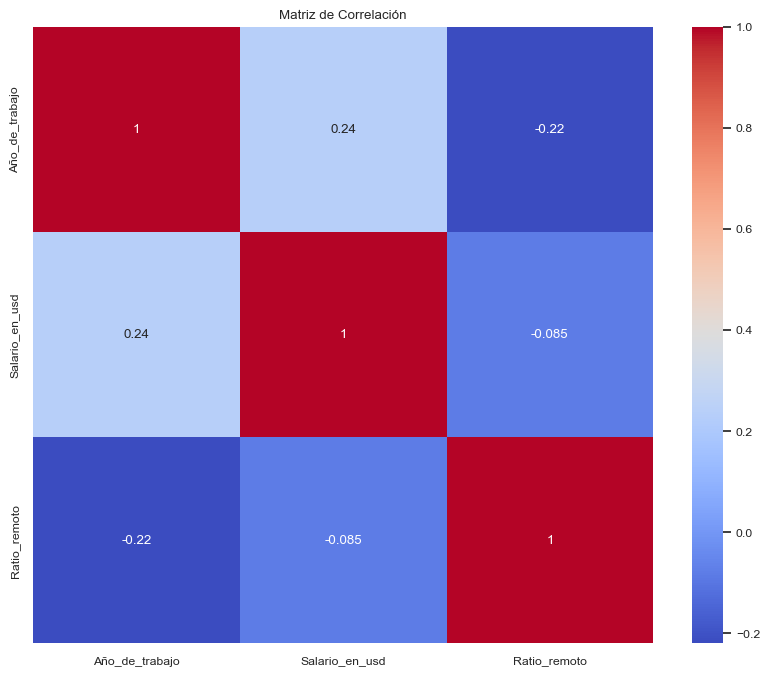

In [82]:
# Convertir las columnas relevantes a tipo numérico
numeric_columns = ['Año_de_trabajo', 'Salario_en_usd', 'Ratio_remoto']
data_df[numeric_columns] = data_df[numeric_columns].astype(float)

# Calcular la matriz de correlación
corr = data_df[numeric_columns].corr()

# Generar el gráfico de correlación
plt.figure(figsize=(10, 8))
sbn.heatmap(corr, annot=True, cmap='coolwarm')

# Configurar el título
plt.title('Matriz de Correlación')

# Mostrar el gráfico
plt.show()

Interpretación
- La correlación entre 'Año_de_trabajo' y 'Año_de_trabajo' es 1, ya que es la misma variable. Esto indica una correlación perfecta.
- La correlación entre 'Año_de_trabajo' y 'Salario_en_usd' es 0.24. Esto sugiere una correlación positiva débil entre el año de trabajo y el salario en dólares.
- La correlación entre 'Año_de_trabajo' y 'Ratio_remoto' es -0.22. Esto indica una correlación negativa moderada entre el año de trabajo y el ratio remoto.
- La correlación entre 'Salario_en_usd' y 'Salario_en_usd' es 1, ya que es la misma variable. Esto también indica una correlación perfecta.
- La correlación entre 'Salario_en_usd' y 'Ratio_remoto' es -0.085. Esto sugiere una correlación negativa muy débil entre el salario en dólares y el ratio remoto.
- La correlación entre 'Ratio_remoto' y 'Ratio_remoto' es 1, ya que es la misma variable. Esto indica una correlación perfecta.

**3) Procesamiento y análisis de datos: Aplicar técnicas de procesamiento de datos para realizar tareas como filtrado, agregación, transformación y cálculo de métricas relevantes para el tema elegido. Utilizar herramientas de software y lenguajes de programación adecuados para llevar a cabo estas tareas.**